In [15]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

mean_height = 5.5*12
stdev_height = 1*12
target = 6*12


mean_height + np.random.normal()*stdev_height


height_surveys = np.zeros((10000,10))
for i in range(height_surveys.shape[0]):
    for j in range(height_surveys.shape[1]):
        height_surveys[i,j] = mean_height +\
                              np.random.normal()*stdev_height
print('Mean Height:', round(np.mean(height_surveys)/12,1), 'feet')
print('Standard Deviation of Height:', 
      round(np.var(height_surveys)**0.5/12,1), 'foot')

Mean Height: 5.5 feet
Standard Deviation of Height: 1.0 foot


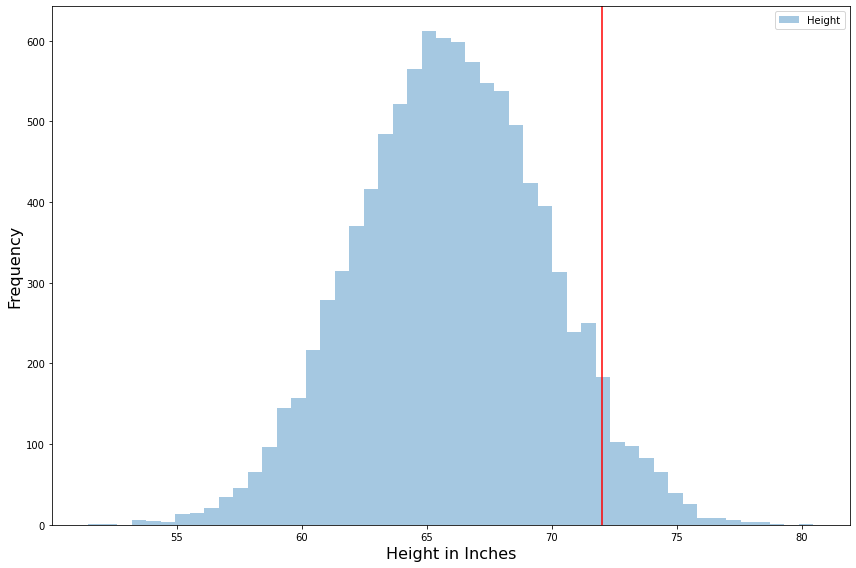

In [16]:
# Histogram that shows the distribution for the mean of all surveys
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(np.mean(height_surveys,axis=1), 
             kde=False, label='Height')
ax.set_xlabel("Height in Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(target, color='red')
plt.legend()
plt.tight_layout()

In [17]:
# I picked sample number 35 at random to plot earlier
np.var(height_surveys[35])**0.5    # = 12.5

10.096835542545646

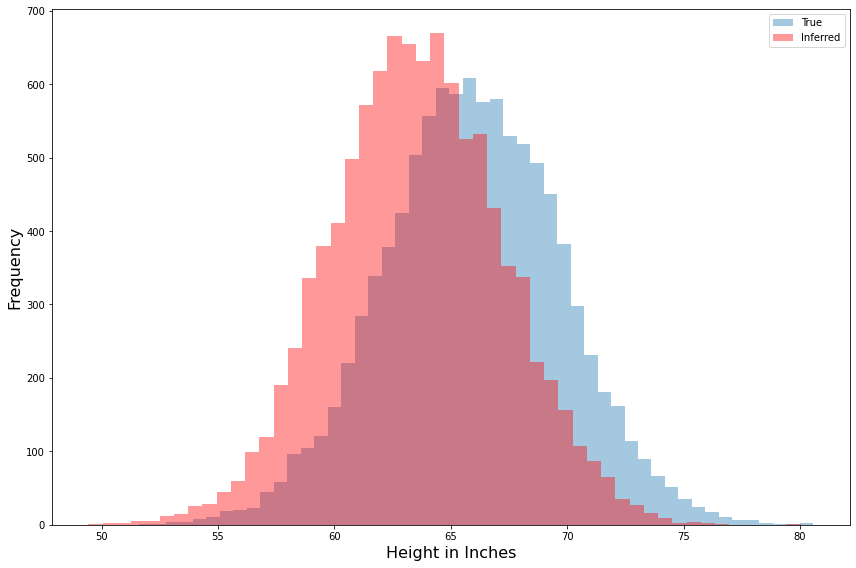

In [8]:
# Compare mean of all surveys with inferred distribution
fig, ax = plt.subplots(figsize=(12,8))
# Plot histogram of 10,000 sample means
sns.distplot(np.mean(height_surveys,axis=1), 
             kde=False, label='True')
# Calculate stats using single sample
sample_mean = np.mean(height_surveys[35])
sample_stdev = np.var(height_surveys[35])**0.5
# Calculate standard error
std_error = sample_stdev/(height_surveys[35].shape[0])**0.5
# Infer distribution using single sample
inferred_dist = [sample_mean + np.random.normal()*\
                 std_error for i in range(10000)]
# Plot histogram of inferred distribution
sns.distplot(inferred_dist, kde=False, 
             label='Inferred', color='red')
ax.set_xlabel("Height in Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.tight_layout()

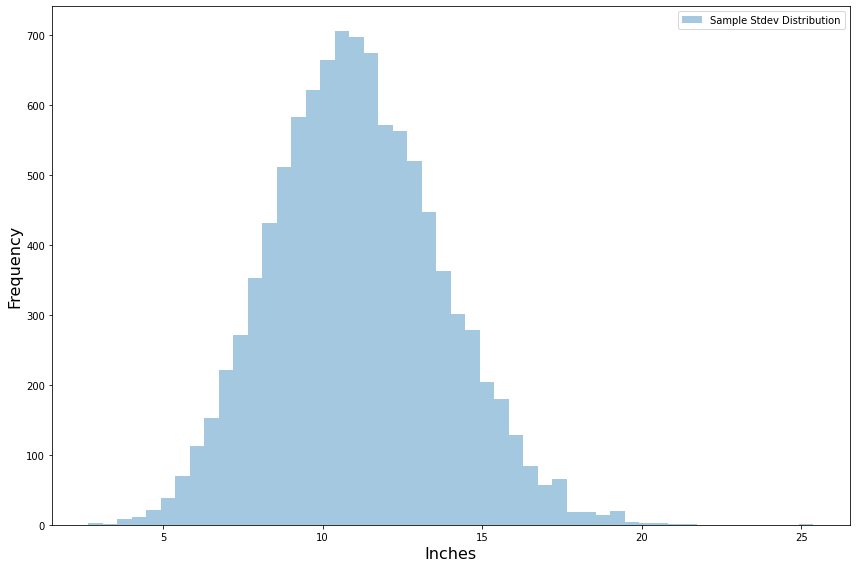

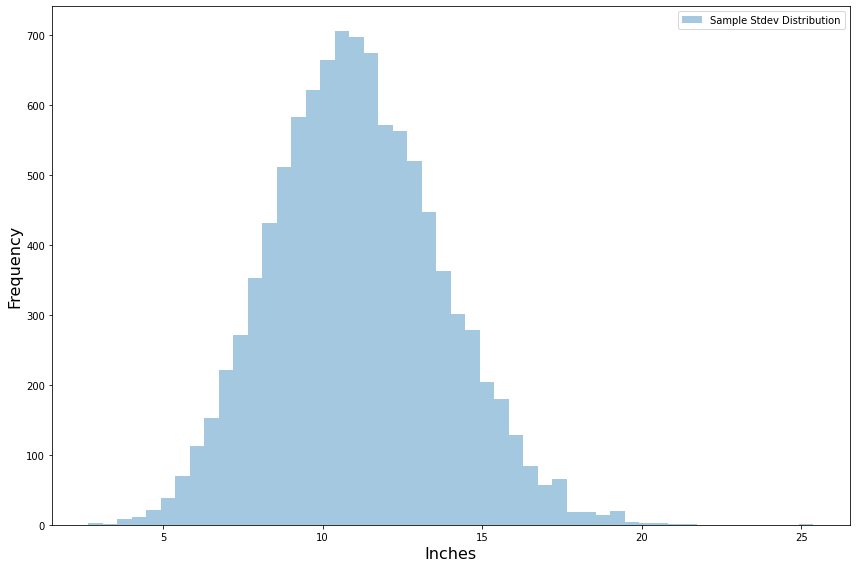

In [9]:
# Check out the distribution of the sample standard deviations
vol_dist = np.var(height_surveys, axis=1)**0.5
# Histogram that shows the distribution of sample stdev
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(vol_dist, kde=False, 
             label='Sample Stdev Distribution')
ax.set_xlabel("Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.tight_layout()# Check out the distribution of the sample standard deviations
vol_dist = np.var(height_surveys, axis=1)**0.5
# Histogram that shows the distribution of sample stdev
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(vol_dist, kde=False, 
             label='Sample Stdev Distribution')
ax.set_xlabel("Inches",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.tight_layout()

In [10]:
# Simulation method for answering the question
# Generate 10,000 random variables
inferred_dist = [sample_mean + np.random.normal()*\
                 std_error for i in range(10000)]
# Figure out how many are > than target
sum([1 for i in inferred_dist if i>=target])/len(inferred_dist)

0.0128

In [11]:
1 - norm.cdf(target, loc=sample_mean, scale=std_error)


0.01084416023659096